In [1]:
import tensorflow as tf
import os
import datetime
 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D,Activation,Dropout,Dense,Flatten
from tensorflow.keras.optimizers import Adam
from keras import backend as k
from keras import layers
import numpy as np
from keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
import cv2
import matplotlib.pyplot as plt

from tensorflow.keras.models import save_model, load_model

In [3]:
batch_size = 32 #32,128,256
epochs = 10

In [4]:
train_data_dir = ( r"C:\Users\Lenovo\Desktop\Deep learning\open cv\train")
test_data_dir = (r"C:\Users\Lenovo\Desktop\Deep learning\open cv\test")

In [5]:
trainGen = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)
 
testGen = ImageDataGenerator(rescale=1./255)
 
train = trainGen.flow_from_directory(train_data_dir,target_size=(224,224),classes=['with_mask','without_mask'],class_mode = 'categorical',batch_size=batch_size,shuffle=True)
 
test = testGen.flow_from_directory(test_data_dir,target_size=(224,224),class_mode = 'categorical',batch_size=batch_size)


Found 1356 images belonging to 2 classes.
Found 20 images belonging to 1 classes.


In [7]:
mob = MobileNetV2(alpha=1.0,
    input_shape = (224,224,3),
    include_top = False,
    weights = 'imagenet',
)
mob.trainable = False
 
model = Sequential()
model.add(mob)
 
model.add(GlobalAveragePooling2D())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))
 
model.add(Dense(2,activation='softmax'))
 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_1 ( (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                40992     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 2,299,042
Trainable params: 41,058
Non-trainable params: 2,257,984
_________________________________________________________________


In [9]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train,epochs=epochs,validation_data=test)

Epoch 1/10
43/43 [==============================] - 124s 3s/step - loss: 0.5215 - accuracy: 0.7463 - val_loss: 1.9113 - val_accuracy: 0.4000
Epoch 2/10
43/43 [==============================] - 89s 2s/step - loss: 0.1742 - accuracy: 0.9676 - val_loss: 2.6773 - val_accuracy: 0.4500
Epoch 3/10
43/43 [==============================] - 70s 2s/step - loss: 0.1037 - accuracy: 0.9749 - val_loss: 3.2427 - val_accuracy: 0.4500
Epoch 4/10
43/43 [==============================] - 86s 2s/step - loss: 0.0731 - accuracy: 0.9853 - val_loss: 3.7141 - val_accuracy: 0.4500
Epoch 5/10
43/43 [==============================] - 103s 2s/step - loss: 0.0551 - accuracy: 0.9845 - val_loss: 4.0599 - val_accuracy: 0.4500
Epoch 6/10
43/43 [==============================] - 86s 2s/step - loss: 0.0497 - accuracy: 0.9860 - val_loss: 4.3712 - val_accuracy: 0.4500
Epoch 7/10
43/43 [==============================] - 70s 2s/step - loss: 0.0424 - accuracy: 0.9882 - val_loss: 4.6265 - val_accuracy: 0.4500
Epoch 8/10
43/43 [

In [ ]:
save_model(model,'1.model')

In [3]:
from tensorflow.keras.models import save_model, load_model
saved_model = load_model('1.model', compile=False)


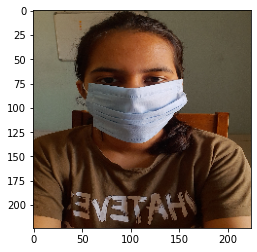

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Instructions for updating:
Please use `model.predict()` instead.
[1]
Probability:[[0.12860276 0.8713972 ]]
Wearing MASK


In [7]:
def predict_mask(path):
    im = cv2.imread(path)
    
    im_resized = cv2.resize(im, (224, 224), interpolation=cv2.INTER_LINEAR)
    
    plt.imshow(cv2.cvtColor(im_resized, cv2.COLOR_BGR2RGB))
    plt.show()
    
     
    img_pred = image.load_img(path,target_size=(224,224))
    
    img_pred = image.img_to_array(img_pred)
    img = np.expand_dims(img_pred,axis=0)
    result = saved_model.predict_classes(img)
    prob = saved_model.predict_proba(img)
    print(result)
    print('Probability:{}'.format(prob))
    if result[0]==0:
        prediction =" Not Wearing MASK"
    else :
        prediction ="Wearing MASK"
    
 
    print(prediction)
 
 
# Function calling 
 
predict_mask(r'C:\Users\Lenovo\Desktop\Deep learning\open cv\test\test_images\nupur.jpg')
#predict_mask('F:/Deep learning/Mask Detection/test/without_mask/12.jpg')

In [8]:
# messages on screen
resMap = {
        0 : 'Mask On',
        1 : 'Wear mask',
        }
 
# Colors on screen
colorMap = {
        0 : (0,255,0),
        1 : (0,0,255),  
    }
 
def prepImg(pth):
    return cv2.resize(pth,(224,224)).reshape(1,224,224,3)/255.0
 
classifier = cv2.CascadeClassifier(r'C:\Users\Lenovo\Desktop\Deep learning\open cv\HaarCascade\haarcascade_frontalface_default.xml')
 
cap = cv2.VideoCapture(0)
while True:
    ret,img = cap.read()
    faces = classifier.detectMultiScale(cv2.cvtColor(img,cv2.COLOR_BGR2GRAY),1.1,2)
 
    for (x, y , w ,h) in faces:
        
        pred = saved_model.predict(prepImg(img))
        pred = np.argmax(pred)
        cv2.rectangle(img, (x,y), (x+w, y+h),colorMap[pred], 3)
        cv2.putText(img, resMap[pred],(x,y-5),cv2.FONT_HERSHEY_SIMPLEX,0.8,(255,255,255),2)        
         
                 
    cv2.imshow('FaceMask Detection',img)
    if cv2.waitKey(1) & 0xff == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()